### **Blinkit data analysis python project**

### **Importing Libraries**

In [1]:
%pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


### Import Raw Data


In [ ]:
df = pd.read_csv("C:/Users/Balanagaiah/Downloads/BlinkIT Grocery Data.csv")


### Sample Data 

In [ ]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


Data Size

In [7]:
print("size of data :", df.shape)

size of data : (8523, 12)


Field Info

In [8]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

Data types

In [9]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### Data cleaning

In [11]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [12]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [13]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### KPI Requirements

In [17]:
# total sales
total_sales = df['Sales'].sum()
# average sales
avg_sales = df['Sales'].mean()
# no of items
no_items_sold = df['Sales'].count()

# average ratings
avg_rating = df['Rating'].mean()
# display
print(f"Total sales: ${total_sales:,.1f}")
print(f"average sales: ${avg_sales:,.1f}")
print(f"no of items sold: {no_items_sold:,.0f}")
print(f"average ratings: ${avg_rating:,.1f}")


Total sales: $1,201,681.5
average sales: $141.0
no of items sold: 8,523
average ratings: $4.0


### Chart requirements

#### Total sales by fat content

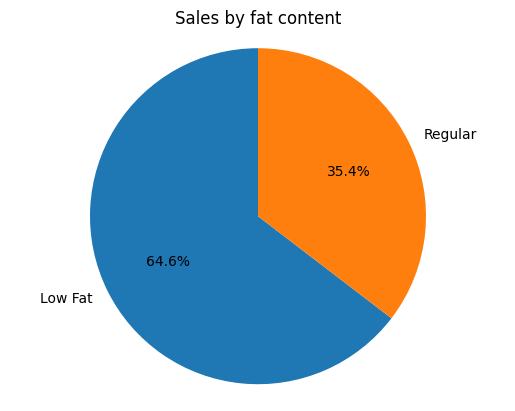

In [21]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat, labels = sales_by_fat.index,
                        autopct = '%.1f%%',
                        startangle = 90)
plt.title('Sales by fat content')
plt.axis('equal')
plt.show()

#### Total sales by ITEM TYPE

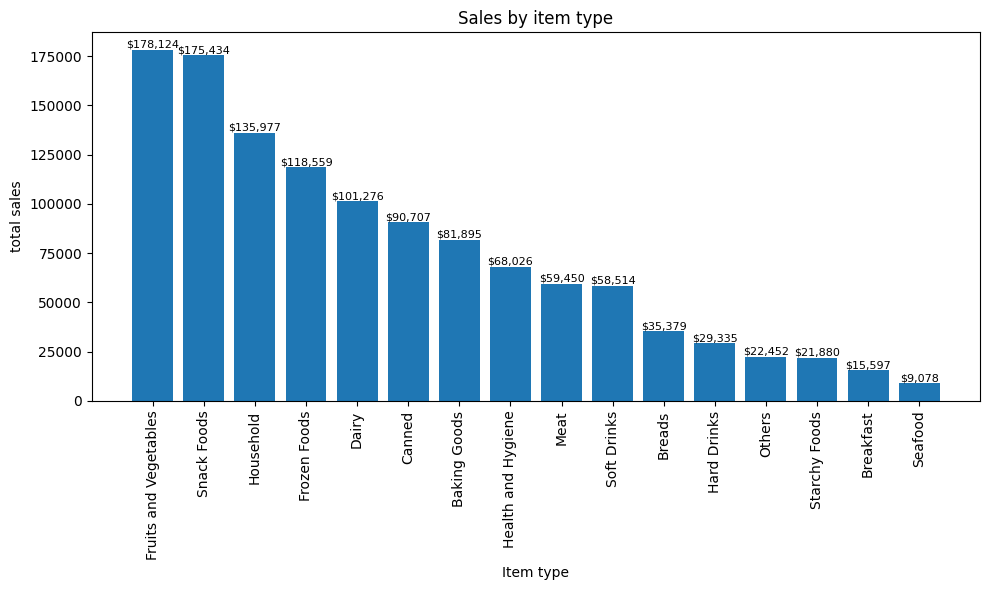

In [26]:
sales_by_TYPE = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize= (10,6))
bars = plt.bar(sales_by_TYPE.index,sales_by_TYPE.values)
plt.xticks(rotation = 90)
plt.xlabel('Item type')
plt.ylabel('total sales')
plt.title('Sales by item type')
# data labels text 
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2,bar.get_height(),f'${bar.get_height():,.0f}',ha = 'center',va='bottom',fontsize =  8)
plt.tight_layout()
plt.show()

#### Fat content by outlet tier

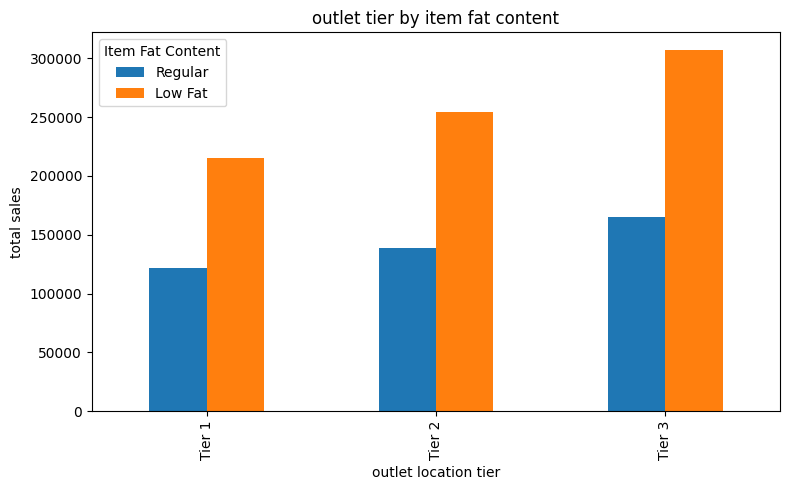

In [30]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped= grouped[['Regular','Low Fat']]
ax = grouped.plot(kind = 'bar',figsize= (8,5), title = 'outlet tier by item fat content')
plt.xlabel('outlet location tier')
plt.ylabel('total sales')
# data labels text 
 #for bar in bars:
    # plt.text(bar.get_x() + bar.get_width() / 2,bar.get_height(),f'${bar.get_height():,.0f}',ha = 'center',va='bottom',fontsize =  8)
plt.legend(title = 'Item Fat Content')
plt.tight_layout()
plt.show()

#### toral sales by outlet establishment year

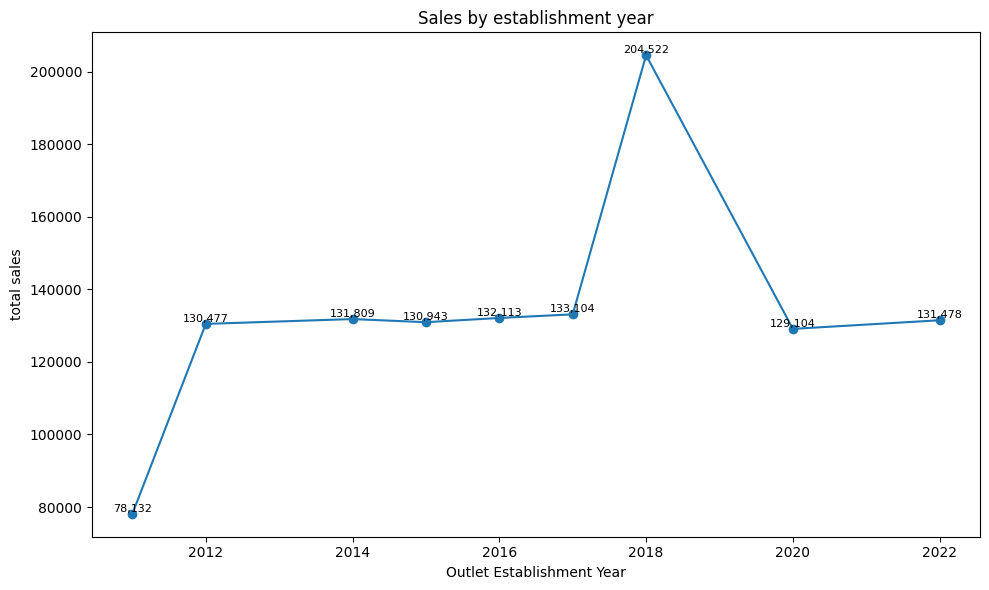

In [38]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize= (10,6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o',linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('total sales')
plt.title('Sales by establishment year')
# data labels text 
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha = 'center', va='bottom', fontsize = 8)

plt.tight_layout()
plt.show()

#### sales by outlet size

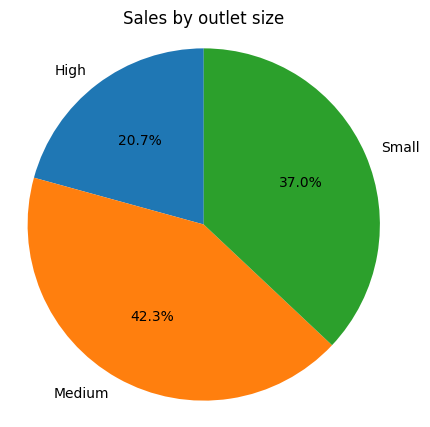

In [41]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(5,5))
plt.pie(sales_by_size, labels = sales_by_size.index,
                        autopct = '%.1f%%',
                        startangle = 90)
plt.title('Sales by outlet size')
plt.axis('equal')
plt.show()

#### sales by location

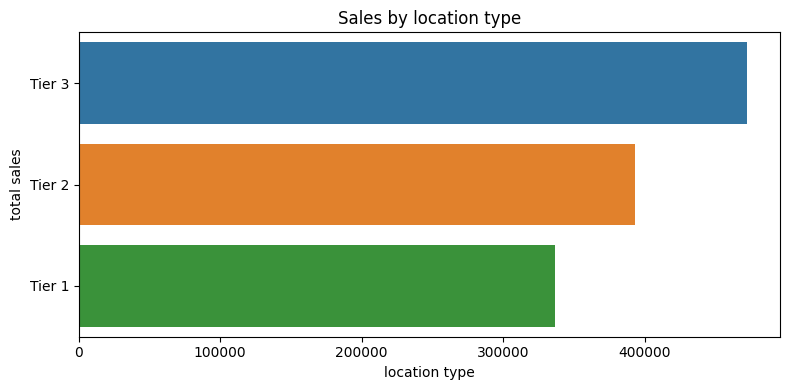

In [47]:
sales_by_loc = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_loc= sales_by_loc.sort_values('Sales',ascending=False)
plt.figure(figsize= (8,4))
ax = sns.barplot(x='Sales',y='Outlet Location Type',data = sales_by_loc)
plt.xlabel('location type')
plt.ylabel('total sales')
plt.title('Sales by location type')
# data labels text 
plt.tight_layout()
plt.show()